In [344]:
# Analysis by Prisca

In [100]:
##### the effectiveness of cancer prediction system helps people to kknow their cancer risk with low cost and it
##### also helps the people to take the appriopriate decision based on their cancer risk status.

In [101]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df=pd.read_csv(r'C:\Users\USER\Documents\dataset\lung cancer survey.csv')

In [103]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [104]:
df.shape

(309, 16)

In [105]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [106]:
df.duplicated().sum()  # duplicates detected

33

In [107]:
df.drop_duplicates(inplace=True)

In [108]:
# data structure

In [109]:
lung_df=df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY','FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
            'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']]

In [110]:
lung_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,2,1,2,2,1,1,NO


In [111]:
lung_df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [112]:
lung_df.shape # data size

(276, 14)

In [113]:
lung_df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [114]:
# visualization

(<Axes: xlabel='LUNG_CANCER', ylabel='count'>,)

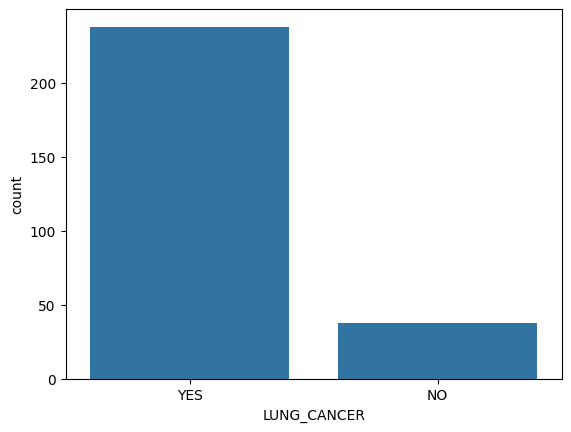

In [115]:
sns.countplot(x='LUNG_CANCER', data=lung_df) ,


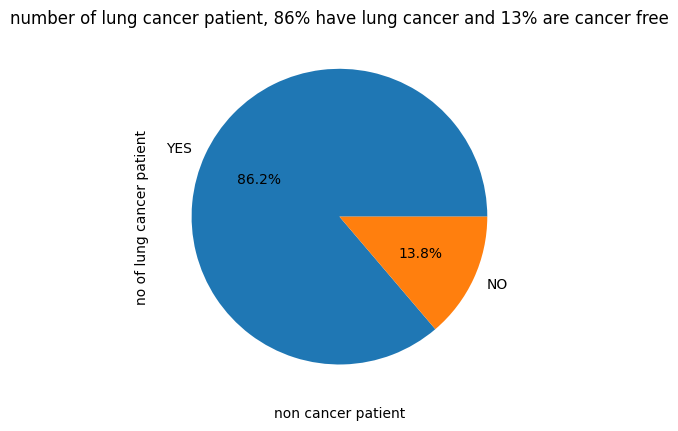

In [116]:
 lung_df['LUNG_CANCER'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('number of lung cancer patient, 86% have lung cancer and 13% are cancer free')
plt.xlabel('non cancer patient')
plt.ylabel('no of lung cancer patient')
plt.savefig('cancer patient 2',pad_inches=0.7,bbox_inches='tight')
# 86.2% of the hospital patient has lung cancer, only 13% are cancer free

In [117]:
dfr=lung_df.groupby(['GENDER'])['LUNG_CANCER'].value_counts()

In [118]:
dfr

GENDER  LUNG_CANCER
F       YES            113
        NO              21
M       YES            125
        NO              17
Name: count, dtype: int64

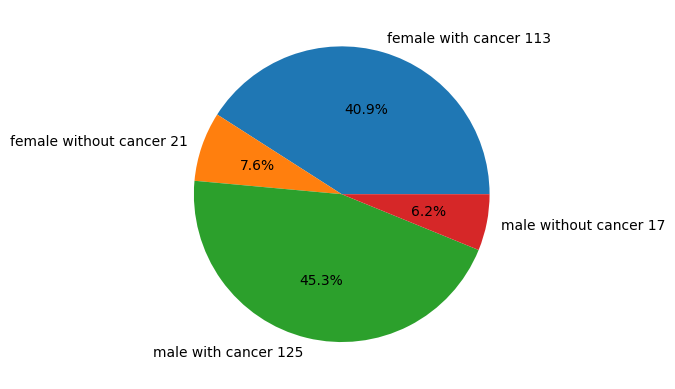

In [119]:
plt.pie(dfr,labels=['female with cancer 113','female without cancer 21','male with cancer 125','male without cancer 17'],autopct='%1.1f%%')
# this chart shows the number of female and male with and without lung cancer
plt.savefig('cancer patient', pad_inches=0.7,bbox_inches='tight')

In [120]:
dfr1=lung_df.groupby('AGE')['LUNG_CANCER'].value_counts()
dfr1

AGE  LUNG_CANCER
21   NO              1
38   YES             1
39   YES             1
44   YES             2
46   NO              1
47   YES             2
     NO              1
48   YES             2
49   YES             3
51   YES             5
52   YES             4
53   YES             4
54   YES             7
55   YES             7
     NO              3
56   YES            14
     NO              2
57   YES             6
     NO              3
58   YES             7
     NO              1
59   YES            11
     NO              4
60   YES            13
     NO              3
61   YES            12
     NO              2
62   YES            15
     NO              1
63   YES            11
     NO              4
64   YES            16
     NO              2
65   YES             5
66   YES             4
67   YES            10
     NO              1
68   YES             6
     NO              3
69   YES             7
     NO              3
70   YES            13
     NO          

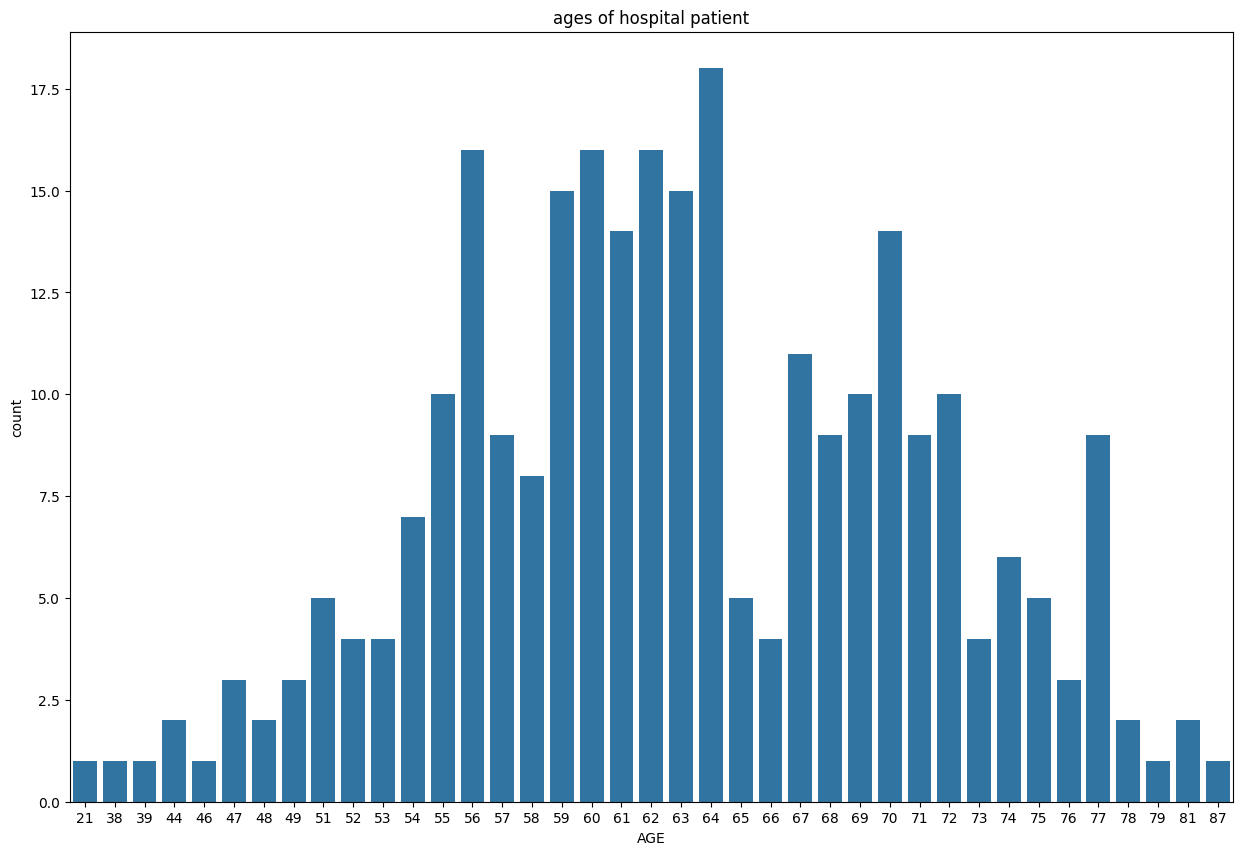

In [343]:

ax=plt.subplots(figsize=(15,10))
sns.countplot(x='AGE',data=lung_df)
plt.title('ages of hospital patient') 
plt.savefig('age of patient',pad_inches=0.8,bbox_inches='tight')

In [122]:
lung_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,2,1,2,2,1,1,NO


In [123]:
dfr2=lung_df.groupby(['COUGHING','CHEST PAIN'])['LUNG_CANCER'].value_counts()

In [124]:
dfr2

COUGHING  CHEST PAIN  LUNG_CANCER
1         1           YES            37
                      NO             20
          2           YES            52
                      NO              8
2         1           YES            59
                      NO              6
          2           YES            90
                      NO              4
Name: count, dtype: int64

In [131]:
lung_df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'FATIGUE ',
       'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN',
       'LUNG_CANCER'],
      dtype='object')

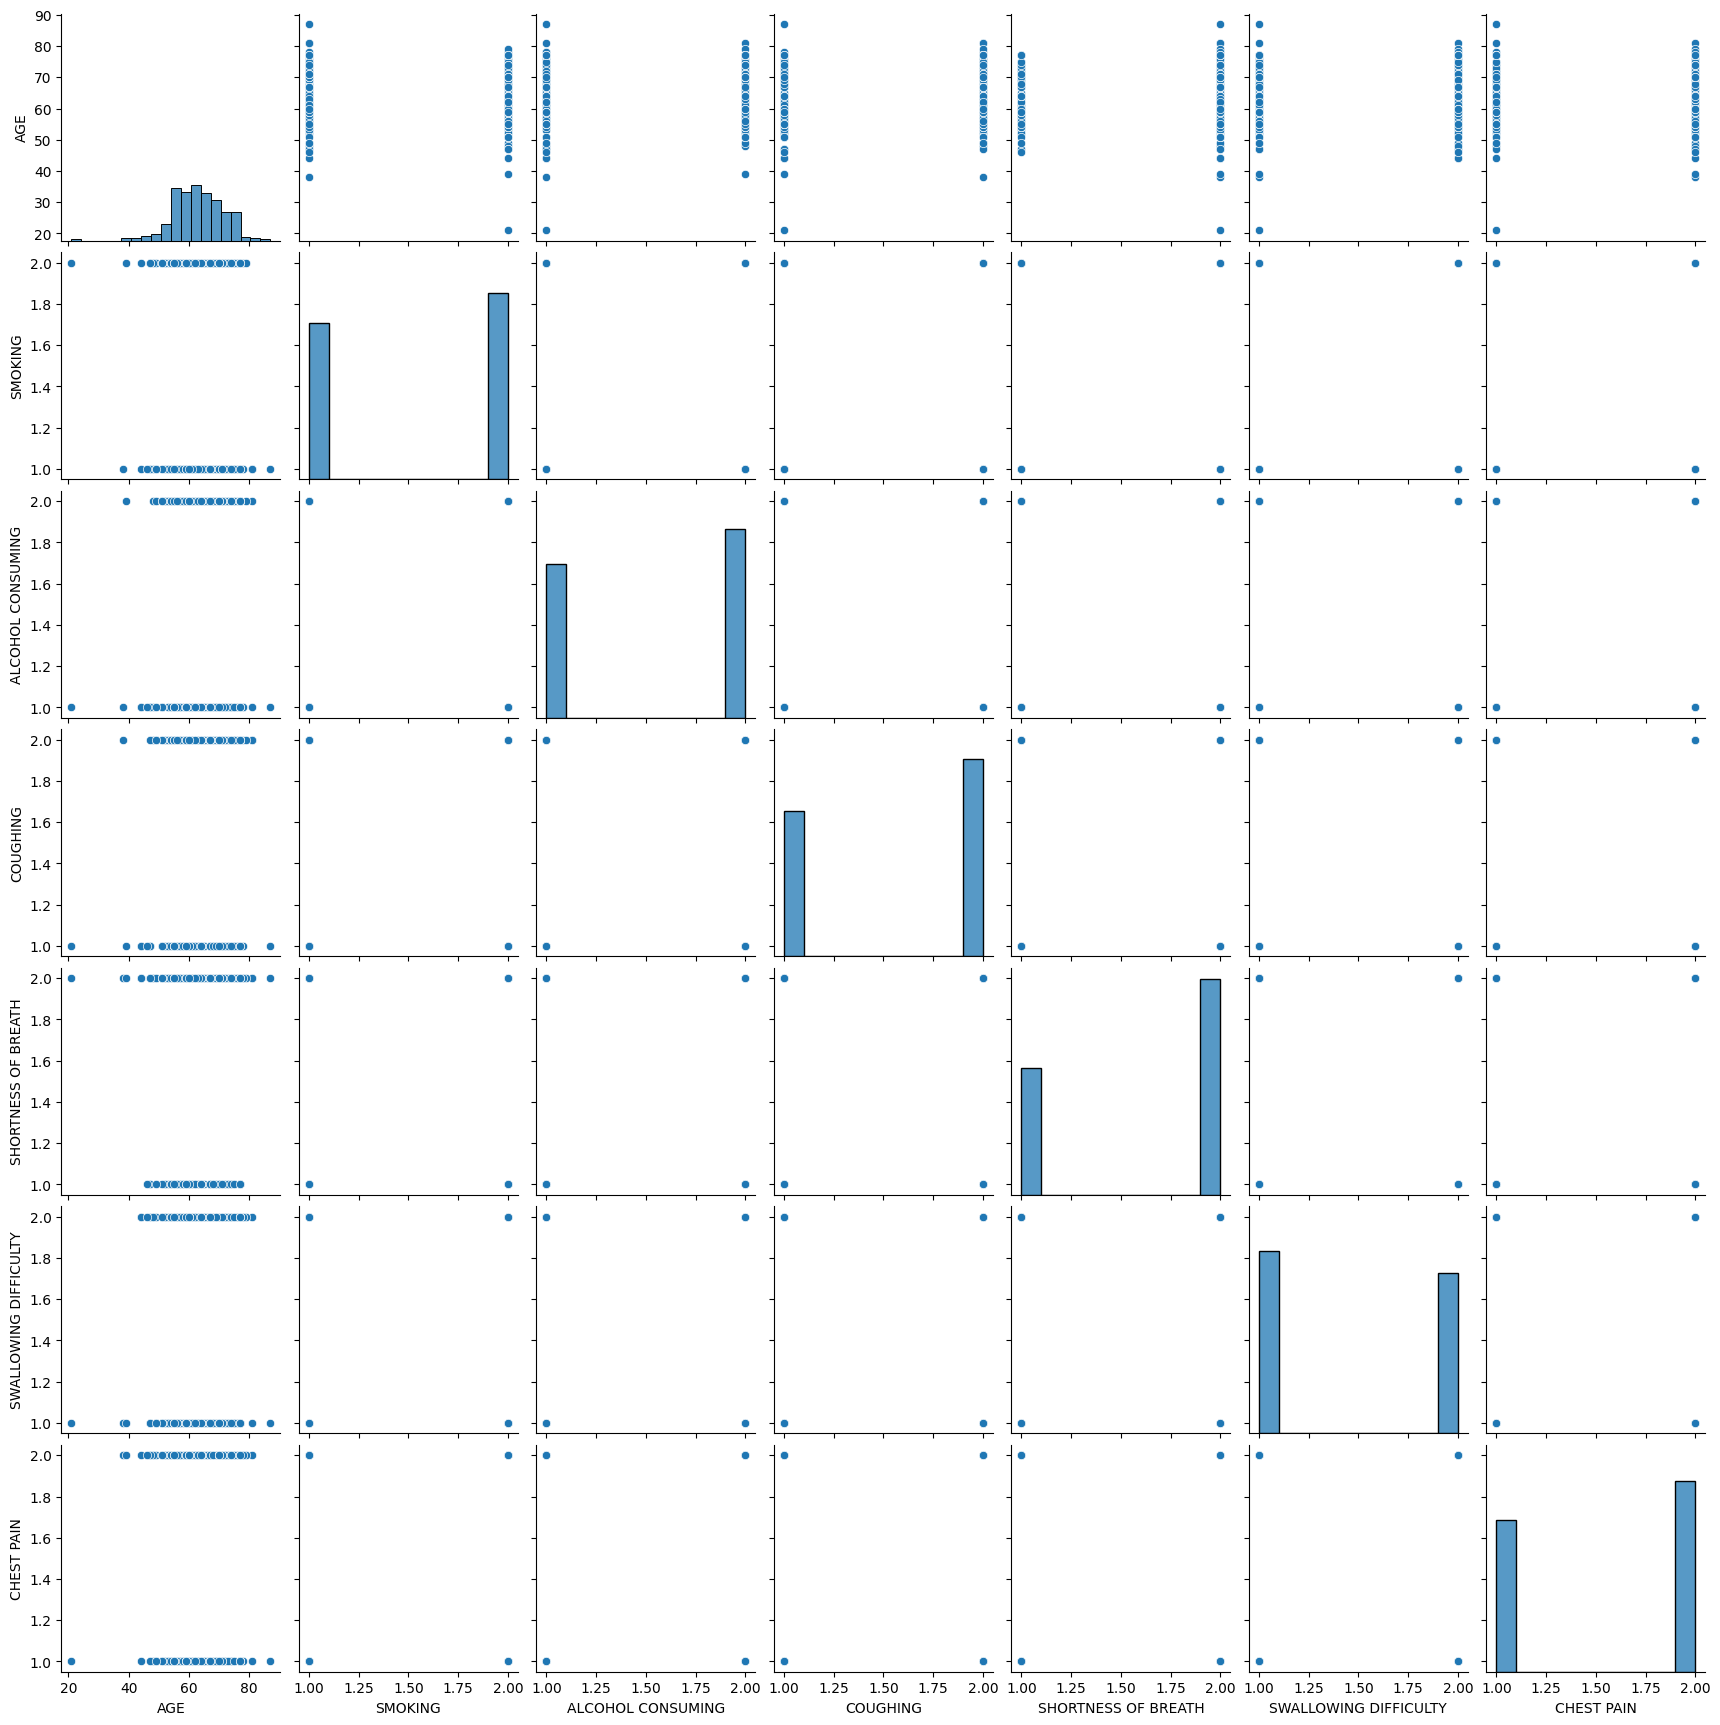

In [126]:
sns.pairplot(lung_df[['GENDER', 'AGE', 'SMOKING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN',
       'LUNG_CANCER']])

#### changing object values to numerical

In [156]:
from sklearn .preprocessing import LabelEncoder

In [158]:
le=LabelEncoder()

In [263]:
lung_df['LUNG_CANCER']=le.fit_transform(lung_df['LUNG_CANCER'])

C:\Users\USER\AppData\Local\Temp\ipykernel_10220\3610150796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lung_df['LUNG_CANCER']=le.fit_transform(lung_df['LUNG_CANCER'])


In [264]:
lung_df['GENDER']=le.fit_transform(lung_df['GENDER'])

C:\Users\USER\AppData\Local\Temp\ipykernel_10220\685198304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lung_df['GENDER']=le.fit_transform(lung_df['GENDER'])


In [265]:
lung_df.head(20)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,2,1,2,2,1,1,0
5,0,75,1,2,1,2,2,2,1,2,2,1,1,1
6,1,52,2,1,1,2,1,2,2,2,2,1,2,1
7,0,51,2,2,2,2,2,1,1,1,2,2,1,1
8,0,68,2,1,2,2,1,1,1,1,1,1,1,0
9,1,53,2,2,2,1,2,1,2,1,1,2,2,1


In [266]:
from sklearn .preprocessing import MinMaxScaler

In [267]:
lung_df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'FATIGUE ',
       'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN',
       'LUNG_CANCER'],
      dtype='object')

In [268]:
x=lung_df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
y=lung_df['LUNG_CANCER']

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [309]:
scaler=MinMaxScaler(feature_range=(0,1))

In [310]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [311]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((220, 13), (56, 13), (220,), (56,))

### model building

In [312]:
from sklearn .ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [313]:
nb=MultinomialNB()
r_forest=RandomForestClassifier()

In [314]:
nb.fit(x_train,y_train)
r_forest.fit(x_train,y_train)

RandomForestClassifier()

In [315]:
nb.score(x_train,y_train)

0.8681818181818182

In [316]:
r_forest.score(x_train,y_train)

0.9954545454545455

In [317]:
from sklearn .linear_model import LogisticRegression

In [318]:
lo_model=LogisticRegression()

In [319]:
lo_model.fit(x_train,y_train)

LogisticRegression()

In [320]:
lo_model.score(x_train,y_train)

0.9181818181818182

In [321]:
from sklearn.metrics import confusion_matrix,classification_report

from sklearn import metrics

In [322]:
ypred=nb.predict(x_test)
metrics.accuracy_score(y_test,ypred)

0.8392857142857143

In [323]:
y_pred=r_forest.predict(x_test)
metrics.accuracy_score (y_test,y_pred)

0.8571428571428571

In [324]:
ypred_log=lo_model.predict(x_test)
metrics.accuracy_score(y_test,ypred_log)

0.8392857142857143

### from the above model , i chose logistic regression which shows better fiting and doing great on validation

In [325]:
cm=confusion_matrix(y_test,ypred_log)

In [326]:
cm

array([[ 5,  4],
       [ 5, 42]], dtype=int64)

<Axes: >

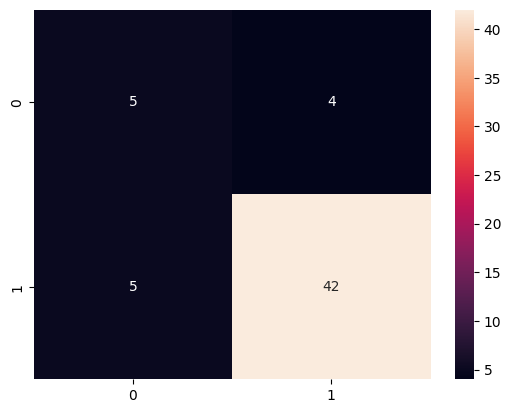

In [327]:
sns.heatmap(cm,annot=True) # model performace at prediction

# validation of model performance

In [328]:
from sklearn . model_selection import KFold,cross_val_score

In [329]:
kf=KFold(n_splits=5)
score=cross_val_score(r_forest,x_train,y_train,cv=kf)

In [330]:
score

array([0.86363636, 0.88636364, 0.97727273, 0.90909091, 0.86363636])

In [331]:
kf=KFold(n_splits=3)
score1=cross_val_score(lo_model,x_train,y_train,cv=kf)

In [332]:
score1

array([0.90540541, 0.90410959, 0.87671233])

In [333]:
kf=KFold(n_splits=3)
score2=cross_val_score(nb,x_train,y_train,cv=kf)

In [334]:
score2

array([0.89189189, 0.8630137 , 0.84931507])

<Axes: xlabel='LUNG_CANCER'>

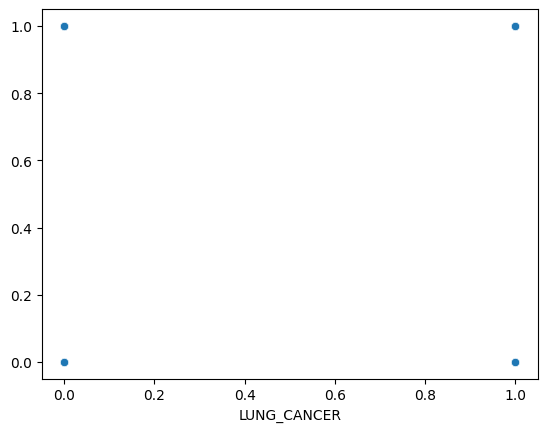

In [335]:
sns.scatterplot(x=y_test,y=ypred_log)

In [336]:
pd.DataFrame({'actual':y_test,
              'predicted': ypred_log}) # visulaizing actual values and predicted values

,actual,predicted
187,1,0
15,1,1
55,1,1
74,1,1
191,1,1
214,1,1
92,1,1
229,1,1
128,1,1
193,1,0


# model testing

In [337]:
lung_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,2,1,2,2,1,1,0


In [338]:
lo_model.predict(scaler.transform([[1	,63,	2,	2,	2,	1,	1,	1,	2,	1,	1,2,	2,]]))	

array([1])

In [339]:
lo_model.predict(scaler.transform([[0,	63,	1,	2,	1,	1,	1,	2,	1,	2,	2,	1,	1]]))

array([1])

In [342]:
lo_model.predict(scaler.transform([[0,	80,	1,	2,	1,	1,	1,	1,	2,	2,	1,	1,	1]]))

array([1])

# conclusion

#### this model will help the hospital or individuals to detect early stage of cancer before it get worse